In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import vgg16
import tensorflow as tf

import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

# Collect and Augment Data

In [54]:
project_path = "C:/Users/Natha/Artificial Intelligence/Tensorflow Image Recognition/DogBreedClassifier"

In [67]:
HEIGHT = 129
WIDTH = 148
input_shape = (WIDTH, HEIGHT, 3)

total_classes = 120

In [68]:
datagen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=30, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True,
                             validation_split=0.2,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode="nearest")

train_data = datagen.flow_from_directory(f"{project_path}/data/Images", 
                                              target_size=(WIDTH, HEIGHT), 
                                              batch_size=50, 
                                              class_mode='categorical', 
                                              subset='training')

validation_data = datagen.flow_from_directory(f"{project_path}/data/Images", 
                                              target_size=(WIDTH, HEIGHT), 
                                              batch_size=50, 
                                              class_mode='categorical', 
                                              subset='validation')

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


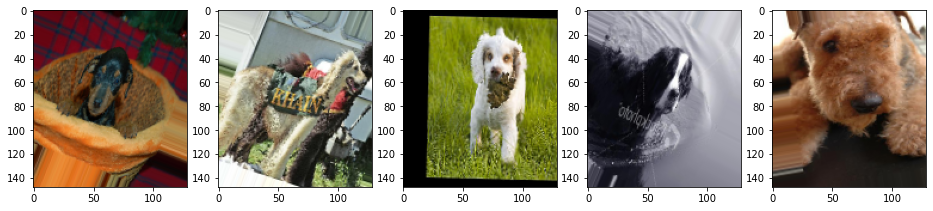

In [69]:
dog = [next(validation_data) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

# Create Model

### VGG16

In [70]:
base_vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = base_vgg.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg_layers = tf.keras.models.Model(base_vgg.input, output)

vgg_layers.trainable = False
for layer in vgg_layers.layers:
    layer.trainable = False
    
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_layers.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\Natha\AppData\Local\Temp\ipykernel_17744\1510272125.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001B59B0066D0>,input_12,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B0067C0>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B006970>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B467E97280>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59AFD7220>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B52CF1B3A0>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B59B01D670>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B01D640>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B01D910>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B016490>,block3_conv3,False


In [71]:
vgg_layers.trainable = True

for layer in vgg_layers.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_layers.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001B59B0066D0>,input_12,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B0067C0>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B006970>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B467E97280>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59AFD7220>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B52CF1B3A0>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B59B01D670>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B01D640>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B01D910>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B59B016490>,block3_conv3,False


In [72]:
vgg_model = Sequential()
vgg_model.add(vgg_layers)

vgg_model.add(tf.keras.layers.Dense(512, activation='relu'))
vgg_model.add(tf.keras.layers.Dropout(0.3))
vgg_model.add(tf.keras.layers.Dense(512, activation='relu'))
vgg_model.add(tf.keras.layers.Dropout(0.3))

vgg_model.add(tf.keras.layers.Dense(total_classes, activation='sigmoid'))

vgg_model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                  metrics=['accuracy'])

### Inception V3

In [73]:
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(WIDTH, HEIGHT, 3))
                             
# Add a global spatial average pooling layer
out = base_inception.output
out = tf.keras.layers.GlobalAveragePooling2D()(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
out = tf.keras.layers.Dense(512, activation='relu')(out)
predictions = tf.keras.layers.Dense(total_classes, activation='softmax')(out)

inception_model = tf.keras.models.Model(inputs=base_inception.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False
    
# Compile 
inception_model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy']) 
inception_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 148, 129, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_302 (Conv2D)            (None, 73, 64, 32)   864         ['input_13[0][0]']               
                                                                                                  
 batch_normalization_302 (Batch  (None, 73, 64, 32)  96          ['conv2d_302[0][0]']             
 Normalization)                                                                                   
                                                                                           

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_312 (Batch  (None, 16, 13, 96)  288         ['conv2d_312[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_313 (Batch  (None, 16, 13, 32)  96          ['conv2d_313[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_287 (Activation)    (None, 16, 13, 64)   0           ['batch_normalization_307[0][0]']
                                                                                                  
 activatio

 activation_304 (Activation)    (None, 16, 13, 64)   0           ['batch_normalization_324[0][0]']
                                                                                                  
 conv2d_322 (Conv2D)            (None, 16, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_325 (Conv2D)            (None, 16, 13, 96)   55296       ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_322 (Batch  (None, 16, 13, 48)  144         ['conv2d_322[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_325 (Batch  (None, 16, 13, 96)  288         ['conv2d_325[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 6, 768)    0           ['activation_308[0][0]',         
                                                                  'activation_311[0][0]',         
                                                                  'max_pooling2d_14[0][0]']       
                                                                                                  
 conv2d_336 (Conv2D)            (None, 7, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_336 (Batch  (None, 7, 6, 128)   384         ['conv2d_336[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_316 (Activation)    (None, 7, 6, 128)    0           ['batch_normalization_336[0][0]']
          

                                                                                                  
 batch_normalization_346 (Batch  (None, 7, 6, 160)   480         ['conv2d_346[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_326 (Activation)    (None, 7, 6, 160)    0           ['batch_normalization_346[0][0]']
                                                                                                  
 conv2d_347 (Conv2D)            (None, 7, 6, 160)    179200      ['activation_326[0][0]']         
                                                                                                  
 batch_normalization_347 (Batch  (None, 7, 6, 160)   480         ['conv2d_347[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_357 (Conv2D)            (None, 7, 6, 160)    179200      ['activation_336[0][0]']         
                                                                                                  
 batch_normalization_357 (Batch  (None, 7, 6, 160)   480         ['conv2d_357[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_337 (Activation)    (None, 7, 6, 160)    0           ['batch_normalization_357[0][0]']
                                                                                                  
 conv2d_353 (Conv2D)            (None, 7, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_35

                                                                                                  
 activation_347 (Activation)    (None, 7, 6, 192)    0           ['batch_normalization_367[0][0]']
                                                                                                  
 conv2d_363 (Conv2D)            (None, 7, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_368 (Conv2D)            (None, 7, 6, 192)    258048      ['activation_347[0][0]']         
                                                                                                  
 batch_normalization_363 (Batch  (None, 7, 6, 192)   576         ['conv2d_363[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_376 (Conv2D)            (None, 7, 6, 192)    258048      ['activation_355[0][0]']         
                                                                                                  
 batch_normalization_372 (Batch  (None, 7, 6, 192)   576         ['conv2d_372[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_376 (Batch  (None, 7, 6, 192)   576         ['conv2d_376[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_352 (Activation)    (None, 7, 6, 192)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_360 (Activation)    (None, 3, 2, 384)    0           ['batch_normalization_380[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 3, 2, 384)    0           ['batch_normalization_381[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 3, 2, 384)    0           ['batch_normalization_384[0][0]']
                                                                                                  
 activation_365 (Activation)    (None, 3, 2, 384)    0           ['batch_normalization_385[0][0]']
                                                                                                  
 batch_normalization_386 (Batch  (None, 3, 2, 192)   576         ['conv2d_386[0][0]']             
 Normaliza

                                                                                                  
 activation_374 (Activation)    (None, 3, 2, 384)    0           ['batch_normalization_394[0][0]']
                                                                                                  
 batch_normalization_395 (Batch  (None, 3, 2, 192)   576         ['conv2d_395[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_367 (Activation)    (None, 3, 2, 320)    0           ['batch_normalization_387[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 2, 768)    0           ['activation_369[0][0]',         
                                                                  'activation_370[0][0]']         
          

### Xception

In [74]:
base_xception = Xception(weights="imagenet", include_top=False, input_shape=(WIDTH, HEIGHT, 3))

for layer in base_xception.layers:
    layer.trainable = False

x = base_xception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = Dense(total_classes, activation='softmax')(x)

xception_model = Model(inputs=base_xception.input, outputs=predictions)
xception_model.compile(tf.keras.optimizers.Adam(lr=.1e-3), 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

xception_model.summary()
layers = [(layer, layer.name, layer.trainable) for layer in base_xception.layers]
layers = layers[15:30]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 148, 129, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 73, 64, 32)   864         ['input_14[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 73, 64, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 18, 16, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 18, 16, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_398 (Conv2D)            (None, 9, 8, 728)    186368      ['add_61[0][0]']                 
                                                                                                  
 block4_po

                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 9, 8, 728)   2912        ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 9, 8, 728)   0           ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block7_sepconv2 (SeparableConv  (None, 9, 8, 728)   536536      ['block7_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_se

                                                                  'add_66[0][0]']                 
                                                                                                  
 block10_sepconv1_act (Activati  (None, 9, 8, 728)   0           ['add_67[0][0]']                 
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 9, 8, 728)   536536      ['block10_sepconv1_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block10_sepconv1_bn (BatchNorm  (None, 9, 8, 728)   2912        ['block10_sepconv1[0][0]']       
 alization)                                                                                       
          

 block12_sepconv3 (SeparableCon  (None, 9, 8, 728)   536536      ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 9, 8, 728)   2912        ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_70 (Add)                   (None, 9, 8, 728)    0           ['block12_sepconv3_bn[0][0]',    
                                                                  'add_69[0][0]']                 
                                                                                                  
 block13_sepconv1_act (Activati  (None, 9, 8, 728)   0           ['add_70[0][0]']                 
 on)      

C:\Users\Natha\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.merging.add.Add object at 0x000001B59B0857C0>,add_60,False
1,<keras.layers.core.activation.Activation object at 0x000001B5A3DF51F0>,block3_sepconv1_act,False
2,<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x000001B5A3E0E370>,block3_sepconv1,False
3,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001B59B09BE20>,block3_sepconv1_bn,False
4,<keras.layers.core.activation.Activation object at 0x000001B5A3E0BA00>,block3_sepconv2_act,False
5,<keras.layers.convolutional.separable_conv2d.SeparableConv2D object at 0x000001B5A3E0BA90>,block3_sepconv2,False
6,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001B5A3E11700>,block3_sepconv2_bn,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x000001B5235E90A0>,conv2d_397,False
8,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B5A3E11130>,block3_pool,False
9,<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001B5A3DA5B20>,batch_normalization_397,False


# Train Model

In [75]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('val_accuracy') > 0.95:
            print("Threshold accuracy has been reached.")
            self.model.stop_training = True
            
callbacks = myCallback()

In [76]:
history = xception_model.fit(train_data, epochs=20,
                              validation_data=validation_data,
                              verbose=1, callbacks=[callbacks])

Epoch 1/20
331/331 [==============================] - 82s 243ms/step - loss: 3.2407 - accuracy: 0.2776 - val_loss: 2.3365 - val_accuracy: 0.4266
Epoch 2/20
331/331 [==============================] - 80s 242ms/step - loss: 2.1657 - accuracy: 0.4476 - val_loss: 2.1876 - val_accuracy: 0.4487
Epoch 3/20
331/331 [==============================] - 80s 241ms/step - loss: 2.0172 - accuracy: 0.4784 - val_loss: 2.1231 - val_accuracy: 0.4560
Epoch 4/20
331/331 [==============================] - 80s 242ms/step - loss: 1.9179 - accuracy: 0.4963 - val_loss: 2.1049 - val_accuracy: 0.4627
Epoch 5/20
331/331 [==============================] - 80s 241ms/step - loss: 1.8368 - accuracy: 0.5167 - val_loss: 2.0965 - val_accuracy: 0.4639
Epoch 6/20
331/331 [==============================] - 80s 242ms/step - loss: 1.7906 - accuracy: 0.5260 - val_loss: 2.0632 - val_accuracy: 0.4656
Epoch 7/20
331/331 [==============================] - 80s 242ms/step - loss: 1.7225 - accuracy: 0.5374 - val_loss: 2.0361 - val_ac

In [83]:
xception_model.save("dog_breed_classifier")

INFO:tensorflow:Assets written to: dog_breed_classifier\assets


INFO:tensorflow:Assets written to: dog_breed_classifier\assets


# Inference

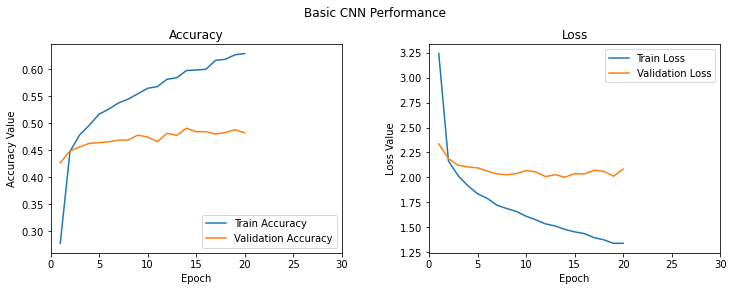

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,21))

ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

1/1 [==============================] - 0s 14ms/step
vizsla:0.4401187598705292


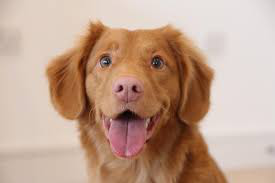

In [81]:
result = os.listdir(f'{project_path}/data/Images')
results = []
for item in result:
    x = item.split("-")
    results.append(x[-1])
    
test_image = Image.open(f'{project_path}/test/dog_image2.jpg')
image = test_image.resize((HEIGHT, WIDTH))
image = np.expand_dims(image, axis=0)
image = np.array(image)
image = image/255
print(f'{results[np.argmax(xception_model.predict([image]))]}:{np.max(xception_model.predict([image]))}')
test_image

In [ ]:
result = os.listdir('C:/Users/Natha/Downloads/archive/images/Images')
results = []
for item in result:
    x = item.split("-")
    results.append(x[-1])
    

video = cv2.VideoCapture(0)
while True:
    _, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    img = cv2.resize(frame, (147, 128))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image/255
    
    cv2.putText(frame, f'{results[np.argmax(xceptionModel.predict(img_array))]}: {np.max(xceptionModel.predict(img_array))}', (0, 60), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
    cv2.imshow("image", image)
    key = cv2.waitKey(1)
    if key==ord('q'):
        break
        
video.release()
cv2.destroyAllWindows()